# Importing the necessary libraries

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

The annotation file has already been created in the ADHD analysis I performed earlier, so for this one, I'll be going straight to the gene analysis and then the gene set analysis 

# GENE ANALYSIS

In [3]:
#  First I'll view the first few lines of the bipolar disorder summary statistics  data 
#Cleaning up the downloaded the bipolar statistics data and saving the cleaned data in a new csv file 


file_path = '/Users/cokpe/Documents/MAGMA_project/pgc-bip2021-BDII.vcf.tsv'
num_metadata_lines = 73 #the metadata in the file is the first 73 lines 
column_names = ['CHROMOSOME', 'POS', 'SNP_ID', 'A1', 'A2', 'BETA', 'SE', 'PVAL', 'NGT', 'FCAS', 'FCON', 'IMPINFO', 'NEFFDIV2', 'NCAS', 'NCON', 'DIRE']
bip_stat = pd.read_csv(file_path, sep='\t', on_bad_lines='skip', skiprows=num_metadata_lines, names = column_names)

print(bip_stat.head())

#saving the cleaned data to a new csv file 
bip_stat.to_csv('cleaned_bipolar_stat_data.csv', index=False)

   CHROMOSOME        POS       SNP_ID A1 A2      BETA      SE    PVAL  NGT  \
0           8  106973048   rs79643588  G  A  0.039500  0.0338  0.2426    0   
1           8  101592213   rs62513865  C  T  0.023297  0.0401  0.5609    0   
2           8  100516008  rs117278216  T  C -0.044297  0.0949  0.6407    0   
3           8  108690829   rs17396518  T  G -0.007196  0.0199  0.7166    3   
4           8  108681675     rs983166  A  C -0.003195  0.0198  0.8709    0   

    FCAS   FCON  IMPINFO  NEFFDIV2  NCAS    NCON  \
0  0.907  0.904    1.000  11036.53  6635  362713   
1  0.927  0.927    0.951  10332.53  6221  358138   
2  0.981  0.974    0.896   7104.86  4395  297916   
3  0.566  0.585    0.974  11280.52  6781  364075   
4  0.566  0.598    0.990  11280.52  6781  364075   

                              DIRE  
0  ---+-+++--+--?--?--+++------?-?  
1  ?+-+--++----??-+???-+?---++??+?  
2  ??????+++?-???????????-+?-?????  
3  ---++-----+-++--++-+-+++-+++-++  
4  ---++------++--+++-+-++-++++-+

In [7]:
# now lets view the cleaned csv file 
cleaned_bip = pd.read_csv('cleaned_bipolar_stat_data.csv')
print(cleaned_bip.head())

   CHROMOSOME        POS       SNP_ID A1 A2      BETA      SE    PVAL  NGT  \
0           8  106973048   rs79643588  G  A  0.039500  0.0338  0.2426    0   
1           8  101592213   rs62513865  C  T  0.023297  0.0401  0.5609    0   
2           8  100516008  rs117278216  T  C -0.044297  0.0949  0.6407    0   
3           8  108690829   rs17396518  T  G -0.007196  0.0199  0.7166    3   
4           8  108681675     rs983166  A  C -0.003195  0.0198  0.8709    0   

    FCAS   FCON  IMPINFO  NEFFDIV2  NCAS    NCON  \
0  0.907  0.904    1.000  11036.53  6635  362713   
1  0.927  0.927    0.951  10332.53  6221  358138   
2  0.981  0.974    0.896   7104.86  4395  297916   
3  0.566  0.585    0.974  11280.52  6781  364075   
4  0.566  0.598    0.990  11280.52  6781  364075   

                              DIRE  
0  ---+-+++--+--?--?--+++------?-?  
1  ?+-+--++----??-+???-+?---++??+?  
2  ??????+++?-???????????-+?-?????  
3  ---++-----+-++--++-+-+++-+++-++  
4  ---++------++--+++-+-++-++++-+

So now, we have the cleaned bipolar stats data ready

The next step is to extract the relevant information we need from the stats data and use them to create the pval file. This pval file would then be used for the gene analysis.

In [5]:
bim_path = '/Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.bim'
bim_data = pd.read_csv(bim_path, delim_whitespace=True, header=None, names=['CHROMOSOME', 'SNP', 'cm', 'POS', 'A1', 'A2'])
print(bim_data.head())

/var/folders/ly/9_1fxh490gv2y2rm5pl0ltj00000gr/T/ipykernel_1070/3165977758.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bim_data = pd.read_csv(bim_path, delim_whitespace=True, header=None, names=['CHROMOSOME', 'SNP', 'cm', 'POS', 'A1', 'A2'])


   CHROMOSOME          SNP  cm    POS A1 A2
0           1  rs537182016   0  10539  A  C
1           1  rs575272151   0  11008  G  C
2           1  rs544419019   0  11012  G  C
3           1  rs540538026   0  13110  A  G
4           1   rs62635286   0  13116  G  T


In [6]:
# the code below checks if there are SNP ID matches between the cleaned bipolar stats data and the genotype data 

bip_data = pd.read_csv('cleaned_bipolar_stat_data.csv')

bim_path = '/Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.bim'
genotype_data = pd.read_csv(bim_path, delim_whitespace = True, header=None, names=['chromosome', 'SNP', 'cm', 'POS', 'A1', 'A2'])


merged_data = pd.merge(bip_data, genotype_data, left_on='SNP_ID', right_on='SNP', how='inner')

# checking for missing genes in the two datasets 
missing_in_bip = genotype_data[~genotype_data['SNP'].isin(bip_data['SNP_ID'])]
missing_in_genotype = bip_data[~bip_data['SNP_ID'].isin(genotype_data['SNP'])]

print(f'Missing in ADHD: {missing_in_bip.shape[0]} SNPs')
print(f'Missing in Genotype: {missing_in_genotype.shape[0]} SNPs')
print("Length of the adhd_data:", len(bip_data))
print("Length of the genotype_data:", len(genotype_data))

/var/folders/ly/9_1fxh490gv2y2rm5pl0ltj00000gr/T/ipykernel_1070/3161343137.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  genotype_data = pd.read_csv(bim_path, delim_whitespace = True, header=None, names=['chromosome', 'SNP', 'cm', 'POS', 'A1', 'A2'])


Missing in ADHD: 15558324 SNPs
Missing in Genotype: 81496 SNPs
Length of the adhd_data: 7188236
Length of the genotype_data: 22665064


As seen from the output above, out of the 7188236 snps in the bipolar stats dataset, only 81496 were missing in the genotype data.

This means there are 7,106,740 SNPs common in both the genotype dataset and the bipolar stats dataset and this is sufficient for our analysis.

In [8]:
# Now, lets extract the necessary columns needed for the pval_file 
cleaned_bip = pd.read_csv('cleaned_bipolar_stat_data.csv')


# My code to select relevant the columns for the pval file 
pval = cleaned_bip[['SNP_ID', 'CHROMOSOME', 'POS', 'PVAL']]

# With the codes below, I renamed the columns to a form that matches MAGMA's requirements and then saved the output as a text file 
pval.columns = ['SNP', 'CHR', 'BP', 'P']
pval.to_csv('bipolar_pval_file.txt', sep='\t', index=False)

In [9]:
# Lets see what our pval text file looks like 
bipolar_pval = pd.read_csv('bipolar_pval_file.txt', sep='\t')
print(bipolar_pval.head())

           SNP  CHR         BP       P
0   rs79643588    8  106973048  0.2426
1   rs62513865    8  101592213  0.5609
2  rs117278216    8  100516008  0.6407
3   rs17396518    8  108690829  0.7166
4     rs983166    8  108681675  0.8709


All my files are ready and I can now perform the gene analysis

Note that the N was gotten from this formula - cases + control

Cases = 41,917 and control = 371,549

So, N = 413,466

In [10]:
# the gene analysis 
MAGMA_PATH =  "/Users/cokpe/Documents/MAGMA_project/magma_v1.10_mac/magma"
GENOTYPE_PATH = "/Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur"
ANNOT_PATH = "/Users/cokpe/Documents/MAGMA_project/annotation_results"
BIPOLAR_PVAL_PATH = "/Users/cokpe/Documents/MAGMA_project/bipolar_pval_file.txt"


!"{MAGMA_PATH}" --bfile "{GENOTYPE_PATH}" --gene-annot "{ANNOT_PATH}".genes.annot --pval "{BIPOLAR_PVAL_PATH}" N=413,466 --out bipolar_gene_analysis

Welcome to MAGMA v1.10 (custom)
Using flags:
	--bfile /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur
	--gene-annot /Users/cokpe/Documents/MAGMA_project/annotation_results.genes.annot
	--pval /Users/cokpe/Documents/MAGMA_project/bipolar_pval_file.txt N=413,466
	--out bipolar_gene_analysis

Start time is 21:24:44, Monday 03 Jun 2024

Loading PLINK-format data...
Reading file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.fam... 503 individuals read
Reading file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.bim... 22665064 SNPs read
Preparing file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.bed... 

Reading SNP synonyms from file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.synonyms (auto-detected)
	read 6016767 mapped synonyms from file, mapping to 3921040 SNPs in the data
	         skipped all synonym entries involved, synonymous SNPs are kept in analysis
	         writing list of detected synonyms in data to supplementary log file

In [11]:
with open("/Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis.genes.raw", 'r') as file:
    for _ in range(10):
        print(file.readline(), end='')

# VERSION = 110
# COVAR = NSAMP MAC
148398 1 824993 889961 178 23 413 146.978 1.32366
339451 1 860967 911099 130 22 413 99.0538 2.31994 0.642451
84069 1 866872 920488 143 24 413 125.063 2.59427 0.603884 1
26155 1 869583 929679 171 26 413 119.48 2.81667 0.589836 0.975315 1
84808 1 900579 952473 171 20 413 155.485 3.13158 0.139124 0.310061 0.515034 0.76642
9636 1 913847 959920 152 15 413 183.908 3.43381 0.0848806 0.176296 0.371427 0.612779 0.885073
375790 1 920503 1001499 217 22 413 168 3.56867 0.073271 0.157851 0.29068 0.499523 0.722265 0.848659
57801 1 924342 971608 134 14 413 192.873 3.70081 0.0686987 0.166934 0.323534 0.592628 0.878088 1 0.829413


In [12]:
# Now lets view the first few lines of all the gene_analysis files generated 
# the out file 

with open("/Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis.genes.out", 'r') as file:
    for _ in range(10):
        print(file.readline(), end='')


GENE       CHR      START       STOP  NSNPS  NPARAM    N        ZSTAT            P
148398       1     824993     889961    178      23  413       1.3237     0.092808
339451       1     860967     911099    130      22  413       2.3199     0.010172
84069        1     866872     920488    143      24  413       2.5943    0.0047396
26155        1     869583     929679    171      26  413       2.8167    0.0024262
84808        1     900579     952473    171      20  413       3.1316   0.00086934
9636         1     913847     959920    152      15  413       3.4338   0.00029758
375790       1     920503    1001499    217      22  413       3.5687    0.0001794
57801        1     924342     971608    134      14  413       3.7008   0.00010745
401934       1     997126    1044687    122      16  413       2.7608    0.0028832


In [13]:
# the log.suppl file 

with open("/Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis.log.suppl", 'r') as file:
    for _ in range(20):
        print(file.readline(), end='')

##### #####  SNP filtering  ##### #####
# Following sets of synonymous SNP IDs were found in file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.synonyms

##### #####  SNP synonym file  ##### #####
# Following sets of synonymous SNP IDs were found in file /Users/cokpe/Documents/MAGMA_project/g1000_eur/g1000_eur.synonyms
# All were retained in analysis, the corresponding synonym definitions were skipped
rs74957513	rs144373027
rs9274503	rs547195525
rs73400724	rs539428778
rs201496009	rs377174106
rs562966368	rs567831738
rs4307703	rs530786090
rs536493456	rs548717541
rs199939975	rs567200562
rs34961787	rs552647776
rs4421728	rs575470066
rs200139700	rs377024834
rs115310938	rs587656487
rs201010807	rs587625153
rs369632134	rs374852022


# GENE SET ANALYSIS

The gene set dataset has already been cleaned during the ADHD analysis so lets get straight into the main work 

In [14]:
# the gene set analysis 
MAGMA_PATH =  "/Users/cokpe/Documents/MAGMA_project/magma_v1.10_mac/magma"
GENE_SET_FILE = "/Users/cokpe/Documents/MAGMA_project/gene_set_folder/gene_set_data.txt"
BIPOLAR_GENE_ANALYSIS_DATA  = "/Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis"



!"{MAGMA_PATH}" --set-annot "{GENE_SET_FILE}" --gene-results "{BIPOLAR_GENE_ANALYSIS_DATA}".genes.raw --out bipolar_gene_set_analysis_result

Welcome to MAGMA v1.10 (custom)
Using flags:
	--set-annot /Users/cokpe/Documents/MAGMA_project/gene_set_folder/gene_set_data.txt
	--gene-results /Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis.genes.raw
	--out bipolar_gene_set_analysis_result

Start time is 21:39:10, Monday 03 Jun 2024

Reading file /Users/cokpe/Documents/MAGMA_project/bipolar_gene_analysis.genes.raw... 
	18436 genes read from file
Loading gene-set annotation...
Reading file /Users/cokpe/Documents/MAGMA_project/gene_set_folder/gene_set_data.txt... 
	3795 gene-set definitions read from file
	found 3795 gene sets containing genes defined in genotype data (containing a total of 12480 unique genes)
Preparing variables for analysis...
	truncating Z-scores 3 points below zero or 6 standard deviations above the mean
	truncating covariate values more than 5 standard deviations from the mean
	total variables available for analysis: 3795 gene sets

Parsing model specifications...
Inverting gene-gene correlation matrix

# INTERPRETING THE MAGMA GENE SET ANALYSIS RESULT

In [15]:
# first, lets view the result

results_file = '/Users/cokpe/Documents/MAGMA_project/bipolar_gene_set_analysis_result.gsa.out'
results_df = pd.read_csv(results_file, sep='\t')
print(results_df.head(20))

                             # MEAN_SAMPLE_SIZE = 413
0                               # TOTAL_GENES = 18436
1   # TEST_DIRECTION = one-sided, positive (set), ...
2   # CONDITIONED_INTERNAL = gene size, gene densi...
3   VARIABLE                               TYPE  N...
4   SA_B_CELL_RECEPTOR_COMPLEXES            SET   ...
5   SA_CASPASE_CASCADE                      SET   ...
6   SA_FAS_SIGNALING                        SET   ...
7   SA_G1_AND_S_PHASES                      SET   ...
8   SA_G2_AND_M_PHASES                      SET   ...
9   SA_MMP_CYTOKINE_CONNECTION              SET   ...
10  SA_PROGRAMMED_CELL_DEATH                SET   ...
11  SA_PTEN_PATHWAY                         SET   ...
12  SA_REG_CASCADE_OF_CYCLIN_EXPR           SET   ...
13  SA_TRKA_RECEPTOR                        SET   ...
14  SIG_BCR_SIGNALING_PATHWAY               SET   ...
15  SIG_CD40PATHWAYMAP                      SET   ...
16  SIG_CHEMOTAXIS                          SET   ...
17  SIG_IL4RECEPTOR_IN_B_LYP

In [16]:
import pandas as pd

results_file = 'bipolar_gene_set_analysis_result.gsa.out'
set_results = pd.read_csv(results_file, delim_whitespace=True, comment='#')

print(set_results.head())
print(set_results.columns)

                       VARIABLE TYPE  NGENES      BETA  BETA_STD       SE  \
0  SA_B_CELL_RECEPTOR_COMPLEXES  SET      22  0.306850  0.010594  0.19353   
1            SA_CASPASE_CASCADE  SET      18  0.033160  0.001036  0.19128   
2              SA_FAS_SIGNALING  SET       9 -0.005801 -0.000128  0.27180   
3            SA_G1_AND_S_PHASES  SET      15 -0.159330 -0.004543  0.24791   
4            SA_G2_AND_M_PHASES  SET       8 -0.083796 -0.001745  0.30127   

          P                     FULL_NAME  
0  0.056436  SA_B_CELL_RECEPTOR_COMPLEXES  
1  0.431190            SA_CASPASE_CASCADE  
2  0.508510              SA_FAS_SIGNALING  
3  0.739790            SA_G1_AND_S_PHASES  
4  0.609550            SA_G2_AND_M_PHASES  
Index(['VARIABLE', 'TYPE', 'NGENES', 'BETA', 'BETA_STD', 'SE', 'P',
       'FULL_NAME'],
      dtype='object')


/var/folders/ly/9_1fxh490gv2y2rm5pl0ltj00000gr/T/ipykernel_1070/3328780580.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  set_results = pd.read_csv(results_file, delim_whitespace=True, comment='#')


In [17]:
#  lets check for significant gene sets 

significance_threshold = 0.05
significant_gene_sets = set_results[set_results['P'] < significance_threshold]
print(significant_gene_sets)


                             VARIABLE TYPE  NGENES     BETA  BETA_STD  \
10          SIG_BCR_SIGNALING_PATHWAY  SET      44  0.23439  0.011437   
15    SIG_PIP3_SIGNALING_IN_B_LYMP...  SET      34  0.30430  0.013056   
39              BIOCARTA_AT1R_PATHWAY  SET      26  0.51182  0.019208   
46         BIOCARTA_BARR_MAPK_PATHWAY  SET      14  0.55201  0.015206   
49               BIOCARTA_BCR_PATHWAY  SET      31  0.53732  0.022015   
...                               ...  ...     ...      ...       ...   
3666  WP_SARS_COV_2_AND_ACE2_RECEP...  SET       6  0.82244  0.014835   
3723  WP_TGF_BETA_SIGNALING_IN_THY...  SET      17  0.43133  0.013092   
3763  WP_T_CELL_ANTIGEN_RECEPTOR_T...  SET      60  0.25056  0.014271   
3772  WP_UREA_CYCLE_AND_RELATED_DI...  SET       8  0.56688  0.011806   
3781  WP_VITAMIN_B6_DEPENDENT_AND_...  SET       7  0.53508  0.010425   

           SE         P                                          FULL_NAME  
10    0.12947  0.035133                       

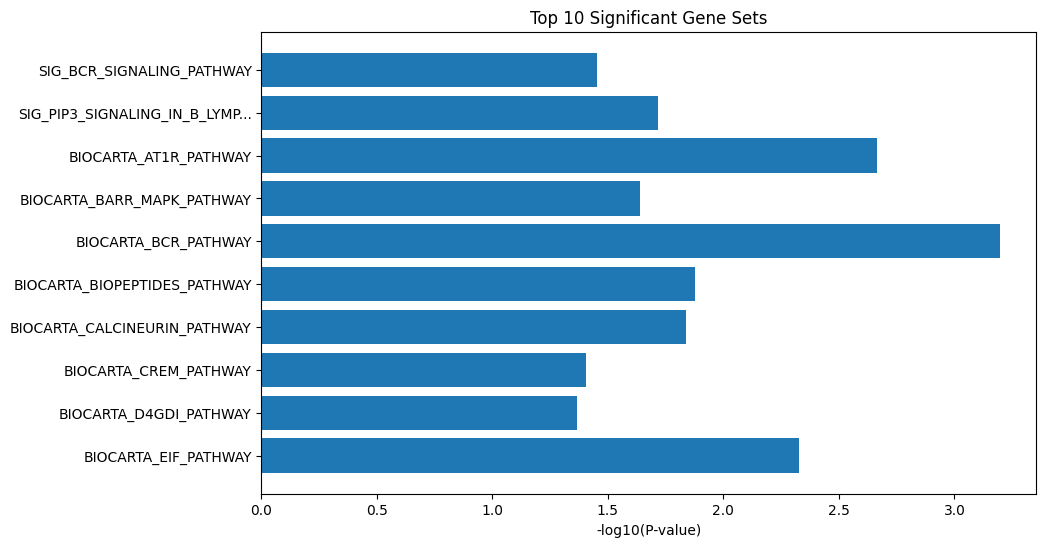

In [18]:
# the bar plot below is used to show the top 10 significant gene sets
top_gene_sets = significant_gene_sets.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_gene_sets['VARIABLE'], -np.log10(top_gene_sets['P']))
plt.xlabel('-log10(P-value)')
plt.title('Top 10 Significant Gene Sets')
plt.gca().invert_yaxis()
plt.show()

Now, lets plot MAGMA beta values against the negative logarithm (base 10) of Bonferroni-corrected p-values

In [19]:
# creating and populating the neg log column 

set_results['neg_log_p'] = -np.log10(set_results['P'])

In [20]:
print(set_results.head())

                       VARIABLE TYPE  NGENES      BETA  BETA_STD       SE  \
0  SA_B_CELL_RECEPTOR_COMPLEXES  SET      22  0.306850  0.010594  0.19353   
1            SA_CASPASE_CASCADE  SET      18  0.033160  0.001036  0.19128   
2              SA_FAS_SIGNALING  SET       9 -0.005801 -0.000128  0.27180   
3            SA_G1_AND_S_PHASES  SET      15 -0.159330 -0.004543  0.24791   
4            SA_G2_AND_M_PHASES  SET       8 -0.083796 -0.001745  0.30127   

          P                     FULL_NAME  neg_log_p  
0  0.056436  SA_B_CELL_RECEPTOR_COMPLEXES   1.248444  
1  0.431190            SA_CASPASE_CASCADE   0.365331  
2  0.508510              SA_FAS_SIGNALING   0.293701  
3  0.739790            SA_G1_AND_S_PHASES   0.130892  
4  0.609550            SA_G2_AND_M_PHASES   0.214991  


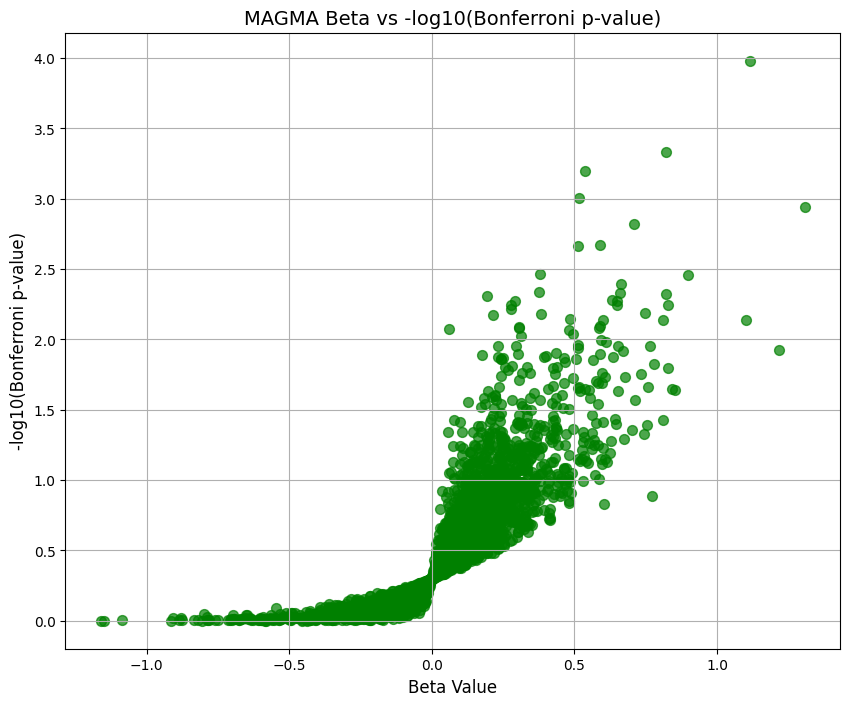

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(set_results['BETA'], set_results['neg_log_p'], color='green', alpha=0.7, s=50)
plt.xlabel('Beta Value', fontsize=12)
plt.ylabel('-log10(Bonferroni p-value)', fontsize=12)
plt.title('MAGMA Beta vs -log10(Bonferroni p-value)', fontsize=14)
plt.grid(True)
plt.show()

The is a scatter plot of MAGMA beta values against the negative logarithm (base 10) of Bonferroni-corrected p-values for each gene set. Each point represents a gene set, with the x-axis indicating the effect size (beta value) and the y-axis representing the significance of the association.

Similar to the ADHD beta values against the negative logarithm (base 10) of Bonferroni-corrected p-values chart, clusters of points concentrated around a beta value of 0.5 or below on the x-axis suggest gene sets with relatively low effect sizes in their association ADHD. The distribution indicates that these gene sets may not exert strong individual effects on the trait but could collectively contribute to its manifestation.

Also, their presence could suggest the involvement of polygenic mechanisms or complex interactions among multiple genes within these sets.

Further investigation into these gene sets may uncover subtle yet meaningful contributions to the trait's genetic architecture, and also reveal insights into its underlying biology or pathophysiology.

Now, lets plot MAGMA number of genes against the negative logarithm (base 10) of Bonferroni-corrected p-values

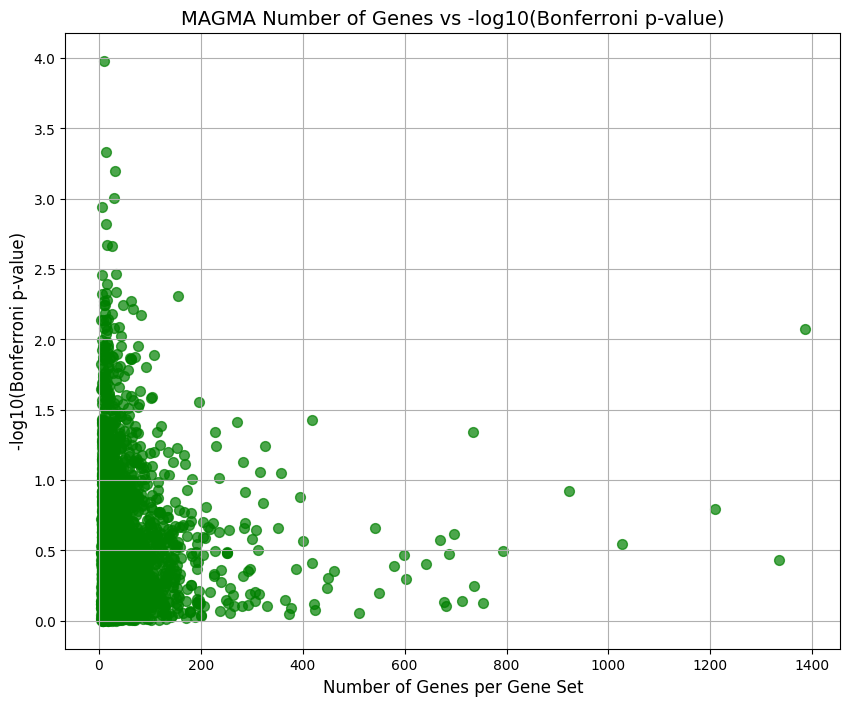

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(set_results['NGENES'], set_results['neg_log_p'], color='green', alpha=0.7, s=50)
plt.xlabel('Number of Genes per Gene Set', fontsize=12)
plt.ylabel('-log10(Bonferroni p-value)', fontsize=12)
plt.title('MAGMA Number of Genes vs -log10(Bonferroni p-value)', fontsize=14)
plt.grid(True)
plt.show()